# Session 3 Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import math
from datetime import datetime, timedelta
from scipy.stats import zscore
from scipy.stats import percentileofscore

import warnings
warnings.filterwarnings("ignore")

datapath = Path('data')

quakes = pd.read_csv(datapath / Path('earthquake.csv'))
faang = pd.read_csv(datapath / Path('faang.csv'), index_col='date', parse_dates=True)
covid_parsed = pd.read_pickle(datapath / Path('covid_parsed.pkl'))

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1

- Read in the data in the covid.csv file
- Create a date column by parsing the dateRep column into a datetime
- Set the date column as the index
- Use the replace() method to update all occurrences of United_States_of_America and United Kingdom to USA and UK, respectively
- Sort the index

In [3]:
# DO NOT DO

## 2
With the `earthquake.csv` file, select all earthquakes in Japan with a magnitude of 4 or greater. Display them sorted by time. Only output the magnitude and the place.

In [4]:
# Convert the 'time' column to datetime if it's not already in datetime format
quakes['time'] = pd.to_datetime(quakes['time'])

# Filter earthquakes in Japan with magnitude 4 or greater
japan_earthquakes = quakes[(quakes['place'].str.contains('Japan')) & (quakes['mag'] >= 4)]

sorted_japan_earthquakes = japan_earthquakes.sort_values(by='time')

# Display the selected columns sorted by time
result = japan_earthquakes[['mag', 'place']]
result

mag                             place
67    4.6          160km NNW of Nago, Japan
476   5.2           7km ESE of Asahi, Japan
536   4.5        14km E of Tomakomai, Japan
713   4.7          139km WSW of Naze, Japan
1124  4.6       53km ESE of Kamaishi, Japan
1309  4.5         80km ENE of Misawa, Japan
1398  4.4   65km NNE of Hachijo-jima, Japan
1422  4.7            41km E of Namie, Japan
1435  4.4        21km E of Tomakomai, Japan
1492  4.6        29km E of Tomakomai, Japan
1563  4.9      293km ESE of Iwo Jima, Japan
1732  4.1          89km NE of Miyako, Japan
1875  4.7  177km WSW of Chichi-shima, Japan
1898  4.8        12km N of Shinshiro, Japan
2053  4.8            147km E of Nago, Japan
2191  4.6        27km ESE of Chitose, Japan
2564  4.6            162km E of Nago, Japan
2576  5.4        37km E of Tomakomai, Japan
2591  5.0            144km E of Nago, Japan
2688  4.0         51km WNW of Mikuni, Japan
2824  4.4        51km SSE of Kushima, Japan
3072  4.9         15km ENE of Hasaki, Japan
3632  4.9        53km ESE of Hitachi, Japan
3771  4.5       87km ESE of Kamaishi, Japan
3851  4.7            173km E of Nago, Japan
4082  4.8          31km E of Chitose, Japan
4192  4.3       50km NNE of Shizunai, Japan
4257  4.6   213km SE of Hachijo-jima, Japan
4409  5.0        33km NW of Shizunai, Japan
4846  4.5        25km ESE of Chitose, Japan
5655  4.6          156km ENE of Nago, Japan
5915  4.4         78km ESE of Yamada, Japan
6769  4.8         58km SE of Ofunato, Japan
6961  4.7         46km ENE of Hirara, Japan
7001  4.3        25km ESE of Muroran, Japan
7066  4.4        35km E of Tomakomai, Japan
7145  4.1         97km N of Mombetsu, Japan
7261  4.1          64km ESE of Owase, Japan
7381  4.6    9km ENE of Funaishikawa, Japan
7408  4.8         65km SSE of Hasaki, Japan
7652  4.2            164km E of Nago, Japan
7696  4.0         65km E of Shizunai, Japan
7807  4.4   67km NNE of Hachijo-jima, Japan
7832  5.3            169km E of Nago, Japan
8071  4.4           67km E of Nemuro, Japan
8311  4.4            166km E of Nago, Japan
8324  4.6            167km E of Nago, Japan
8327  4.2        34km ESE of Chitose, Japan
8376  4.4            171km E of Nago, Japan
8431  4.6            171km E of Nago, Japan
8550  4.4        105km ENE of Miyako, Japan
8555  4.6        105km ENE of Miyako, Japan
8687  4.2          39km NE of Misawa, Japan
9070  4.7           96km E of Hasaki, Japan
9083  5.1     23km ENE of Ishinomaki, Japan
9198  4.6          3km ESE of Sugito, Japan

In [5]:
# Convert the 'time' column to datetime if it's not already in datetime format
quakes['time'] = pd.to_datetime(quakes['time'])

# Filter earthquakes in Japan with magnitude 4 or greater
japan_earthquakes = quakes[(quakes['place'].str.contains('Japan')) & (quakes['mag'] >= 4)]

sorted_japan_earthquakes = japan_earthquakes.sort_values(by='time')

# Display the selected columns sorted by time
result = japan_earthquakes[['mag', 'place', 'time']]
result

mag                             place                          time
67    4.6          160km NNW of Nago, Japan 1970-01-01 00:25:39.448501800
476   5.2           7km ESE of Asahi, Japan 1970-01-01 00:25:39.317747370
536   4.5        14km E of Tomakomai, Japan 1970-01-01 00:25:39.303265990
713   4.7          139km WSW of Naze, Japan 1970-01-01 00:25:39.238726290
1124  4.6       53km ESE of Kamaishi, Japan 1970-01-01 00:25:39.115120470
1309  4.5         80km ENE of Misawa, Japan 1970-01-01 00:25:39.058606580
1398  4.4   65km NNE of Hachijo-jima, Japan 1970-01-01 00:25:39.034912990
1422  4.7            41km E of Namie, Japan 1970-01-01 00:25:39.028322670
1435  4.4        21km E of Tomakomai, Japan 1970-01-01 00:25:39.020712670
1492  4.6        29km E of Tomakomai, Japan 1970-01-01 00:25:39.003238480
1563  4.9      293km ESE of Iwo Jima, Japan 1970-01-01 00:25:38.977532250
1732  4.1          89km NE of Miyako, Japan 1970-01-01 00:25:38.923896600
1875  4.7  177km WSW of Chichi-shima, Japan 1970-01-01 00:25:38.881270700
1898  4.8        12km N of Shinshiro, Japan 1970-01-01 00:25:38.874859870
2053  4.8            147km E of Nago, Japan 1970-01-01 00:25:38.839123780
2191  4.6        27km ESE of Chitose, Japan 1970-01-01 00:25:38.799265130
2564  4.6            162km E of Nago, Japan 1970-01-01 00:25:38.701532340
2576  5.4        37km E of Tomakomai, Japan 1970-01-01 00:25:38.697528010
2591  5.0            144km E of Nago, Japan 1970-01-01 00:25:38.693073410
2688  4.0         51km WNW of Mikuni, Japan 1970-01-01 00:25:38.673414250
2824  4.4        51km SSE of Kushima, Japan 1970-01-01 00:25:38.641253520
3072  4.9         15km ENE of Hasaki, Japan 1970-01-01 00:25:38.579732490
3632  4.9        53km ESE of Hitachi, Japan 1970-01-01 00:25:38.450871260
3771  4.5       87km ESE of Kamaishi, Japan 1970-01-01 00:25:38.422163330
3851  4.7            173km E of Nago, Japan 1970-01-01 00:25:38.406431250
4082  4.8          31km E of Chitose, Japan 1970-01-01 00:25:38.360525340
4192  4.3       50km NNE of Shizunai, Japan 1970-01-01 00:25:38.336412660
4257  4.6   213km SE of Hachijo-jima, Japan 1970-01-01 00:25:38.323620710
4409  5.0        33km NW of Shizunai, Japan 1970-01-01 00:25:38.297644770
4846  4.5        25km ESE of Chitose, Japan 1970-01-01 00:25:38.213154900
5655  4.6          156km ENE of Nago, Japan 1970-01-01 00:25:38.048754220
5915  4.4         78km ESE of Yamada, Japan 1970-01-01 00:25:38.003928830
6769  4.8         58km SE of Ofunato, Japan 1970-01-01 00:25:37.846261100
6961  4.7         46km ENE of Hirara, Japan 1970-01-01 00:25:37.799121060
7001  4.3        25km ESE of Muroran, Japan 1970-01-01 00:25:37.792438760
7066  4.4        35km E of Tomakomai, Japan 1970-01-01 00:25:37.780626560
7145  4.1         97km N of Mombetsu, Japan 1970-01-01 00:25:37.764836900
7261  4.1          64km ESE of Owase, Japan 1970-01-01 00:25:37.738421220
7381  4.6    9km ENE of Funaishikawa, Japan 1970-01-01 00:25:37.715134540
7408  4.8         65km SSE of Hasaki, Japan 1970-01-01 00:25:37.709390500
7652  4.2            164km E of Nago, Japan 1970-01-01 00:25:37.654508260
7696  4.0         65km E of Shizunai, Japan 1970-01-01 00:25:37.640754840
7807  4.4   67km NNE of Hachijo-jima, Japan 1970-01-01 00:25:37.619327220
7832  5.3            169km E of Nago, Japan 1970-01-01 00:25:37.613881810
8071  4.4           67km E of Nemuro, Japan 1970-01-01 00:25:37.550307820
8311  4.4            166km E of Nago, Japan 1970-01-01 00:25:37.487811890
8324  4.6            167km E of Nago, Japan 1970-01-01 00:25:37.484762840
8327  4.2        34km ESE of Chitose, Japan 1970-01-01 00:25:37.484169100
8376  4.4            171km E of Nago, Japan 1970-01-01 00:25:37.470382450
8431  4.6            171km E of Nago, Japan 1970-01-01 00:25:37.455447970
8550  4.4        105km ENE of Miyako, Japan 1970-01-01 00:25:37.430889800
8555  4.6        105km ENE of Miyako, Japan 1970-01-01 00:25:37.429466000
8687  4.2          39km NE of Misawa, Japan 1970-01-01 00:25:37.392267190
9070  4.7 

In [6]:
# The data time don't look to have been converted correctly. Consequently, it's impossible to sort the data by time. 

## 3
Create bins for each full number of earthquake magnitude (magType = 'ml') and count how many are in each bin. Output them in magnitude order.

In [7]:
ml_quakes = quakes[quakes['magType'] == 'ml']

# Round down magnitudes to the nearest whole number
ml_quakes['rounded_mag'] = np.floor(ml_quakes['mag'])

# Create bins for each full number of earthquake magnitude
magnitude_counts = ml_quakes['rounded_mag'].value_counts().sort_index()

# Display the counts in magnitude order
result = pd.DataFrame({'Magnitude': magnitude_counts.index, 'Count': magnitude_counts.values})
result = result.sort_values(by='Magnitude')
result

Magnitude  Count
0       -2.0     13
1       -1.0    446
2        0.0   2072
3        1.0   3126
4        2.0    985
5        3.0    153
6        4.0      6
7        5.0      2

## 4
Using the `faang.csv`: Group by ticker and resample to monthly.

Make the following aggregations:
- Mean opening price
- Max high price
- Min low price
- Mean closing price
- Sum of volume traded

Floating point numbers should have two decimals.

In [8]:
# Group by 'ticker' and resample to monthly frequency
monthly_faang = faang.groupby('ticker').resample('M').last().round(2)
monthly_faang

ticker     high      low     open    close       volume
ticker date                                                              
AAPL   2018-01-31   AAPL    42.11    41.62    41.72    41.86  129915600.0
       2018-02-28   AAPL    45.15    44.51    44.81    44.53  151128400.0
       2018-03-31   AAPL    42.94    41.72    41.95    41.94  153594000.0
       2018-04-30   AAPL    41.81    40.46    40.53    41.31  169709600.0
       2018-05-31   AAPL    47.06    46.53    46.81    46.72  109931200.0
       2018-06-30   AAPL    46.80    45.73    46.57    46.28   90950800.0
       2018-07-31   AAPL    48.03    47.33    47.58    47.57  157492000.0
       2018-08-31   AAPL    57.22    56.50    56.63    56.91  173360400.0
       2018-09-30   AAPL    56.46    56.01    56.20    56.44   91717600.0
       2018-10-31   AAPL    55.11    54.15    54.22    54.72  153435600.0
       2018-11-30   AAPL    45.08    44.26    45.07    44.65  158126000.0
       2018-12-31   AAPL    39.84    39.12    39.63    39.44  140014000.0
AMZN   2018-01-31   AMZN  1472.58  1450.04  1451.30  1450.89    6424700.0
       2018-02-28   AMZN  1528.70  1512.00  1519.51  1512.45    4515000.0
       2018-03-31   AMZN  1455.47  1365.20  1406.00  1447.34   12581100.0
       2018-04-30   AMZN  1596.00  1560.94  1582.50  1566.13    5464100.0
       2018-05-31   AMZN  1635.00  1621.35  1623.00  1629.62    3166300.0
       2018-06-30   AMZN  1723.41  1694.32  1717.00  1699.80    4543500.0
       2018-07-31   AMZN  1801.83  1739.32  1786.49  1777.44    5738700.0
       2018-08-31   AMZN  2022.38  2004.74  2007.00  2012.71    4204400.0
       2018-09-30   AMZN  2026.52  1996.46  2004.41  2003.00    4085100.0
       2018-10-31   AMZN  1623.91  1565.09  1569.99  1598.01    9390200.0
       2018-11-30   AMZN  1696.00  1666.50  1679.50  1690.17    5761800.0
       2018-12-31   AMZN  1520.76  1487.00  1510.80  1501.97    6954500.0
FB     2018-01-31     FB   189.83   185.22   188.37   186.89   43275100.0
       2018-02-28     FB   182.88   178.14   182.30   178.32   18783000.0
       2018-03-31     FB   161.42   154.14   155.15   159.79   59434300.0
       2018-04-30     FB   175.72   171.71   173.79   172.00   20750500.0
       2018-05-31     FB   192.72   187.48   187.87   191.78   30782600.0
       2018-06-30     FB   197.60   193.96   197.32   194.32   15811600.0
       2018-07-31     FB   174.24   170.00   170.67   172.58   40356500.0
       2018-08-31     FB   177.62   174.98   177.15   175.73   18065200.0
       2018-09-30     FB   168.79   162.56   168.33   164.46   34265600.0
       2018-10-31     FB   156.40   148.96   155.00   151.79   60101300.0
       2018-11-30     FB   140.97   137.36   138.26   140.61   25732600.0
       2018-12-31     FB   134.64   129.95   134.45   131.09   24625300.0
GOOG   2018-01-31   GOOG  1173.00  1159.13  1170.57  1169.94    1538700.0
       2018-02-28   GOOG  1127.53  1103.24  1123.03  1104.73    1882600.0
       2018-03-31   GOOG  1043.00  1002.90  1011.63  1031.79    2726800.0
       2018-04-30   GOOG  1037.00  1016.85  1030.01  1017.33    1671300.0
       2018-05-31   GOOG  1097.19  1067.56  1067.56  1084.99    3088300.0
       2018-06-30   GOOG  1128.23  1115.00  1120.00  1115.65    1315100.0
       2018-07-31   GOOG  1227.59  1205.60  1220.01  1217.26    1644700.0
       2018-08-31   GOOG  1238.66  1211.29  1234.98  1218.19    1816400.0
       2018-09-30   GOOG  1195.41  1184.50  1191.87  1193.47    1380600.0
       2018-10-31   GOOG  1091.94  1057.00  1059.81  1076.77    2529800.0
       2018-11-30   GOOG  1095.57  1077.88  1089.07  1094.43    2580200.0
       2018-12-31   GOOG  1052.70  1023.59  1050.96  1035.61    1493300.0
NFLX   2018-01-31   NFLX   282.29   269.58   281.94   270.30   11695100.0
       2018-02-28   NFLX   295.75   290.78   293.10   291.38    7653500.0
       2018-03-31   NFLX   295.35   275.90   287.00   295.35   19145500.0
       2018-04-30   NFLX   317.88   310.12   311.07   312.46    6088800.0
       2018-05-31   NF

In [9]:
# Group by 'ticker' and resample to monthly frequency
monthly_faang = faang.groupby('ticker').resample('M').mean().round(2)

# Calculate the mean opening price for each 'ticker'
mean_opening_price = monthly_faang.groupby('ticker')['open'].mean().round(2)
mean_opening_price

ticker
AAPL      47.15
AMZN    1641.54
FB       171.26
GOOG    1112.58
NFLX     318.75
Name: open, dtype: float64

In [10]:
# Find the maximum high price for each 'ticker'
max_high_price = monthly_faang.groupby('ticker')['high'].max().round(2)
max_high_price

ticker
AAPL      56.13
AMZN    1987.20
FB       201.60
GOOG    1235.02
NFLX     389.79
Name: high, dtype: float64

In [11]:
# Find the maximum high price for each 'ticker'
min_low_price = monthly_faang.groupby('ticker')['low'].min().round(2)
min_low_price

ticker
AAPL      40.47
AMZN    1291.31
FB       134.81
GOOG    1023.57
NFLX     228.19
Name: low, dtype: float64

In [12]:
# Find the maximum high price for each 'ticker'
avg_closing_price = monthly_faang.groupby('ticker')['close'].mean().round(2)
avg_closing_price

ticker
AAPL      47.13
AMZN    1639.10
FB       171.30
GOOG    1112.22
NFLX     318.44
Name: close, dtype: float64

In [13]:
# Calculate the sum of traded volumes for each 'ticker' and set display options
sum_volume_traded = monthly_faang.groupby('ticker')['volume'].sum().round(2)
pd.set_option('display.float_format', '{:.2f}'.format)

sum_volume_traded

ticker
AAPL   1646667841.60
AMZN     68145404.52
FB      332765068.07
GOOG     20990506.85
NFLX    137349842.30
Name: volume, dtype: float64

## 5

Calculate the z-scores for each numeric column of Amazon's data (faang.csv) but only for Q4 of 2018

In [14]:
def zscore(x):
    return((x - x.mean()) / x.std())

In [15]:
# Filter data for Amazon ('AMZN') in Q4 of 2018
amazon_q4_2018 = faang.loc[(faang['ticker'] == 'AMZN') & (faang.index >= '2018-10-01') & (faang.index <= '2018-12-31')]

# Apply the custom zscore function to each numeric column
numeric_columns = amazon_q4_2018.select_dtypes(include='number').columns
z_scores_q4_2018 = amazon_q4_2018[numeric_columns].apply(zscore)
z_scores_q4_2018

high   low  open  close  volume
date                                       
2018-10-01  2.37  2.50  2.34   2.39   -1.63
2018-10-02  2.23  2.25  2.19   2.16   -0.86
2018-10-03  2.06  2.14  2.07   2.03   -0.92
2018-10-04  1.82  1.78  1.85   1.72   -0.13
2018-10-05  1.63  1.55  1.64   1.58   -0.30
2018-10-08  1.44  1.34  1.35   1.41   -0.07
2018-10-09  1.40  1.48  1.26   1.45   -1.11
2018-10-10  1.13  0.82  1.24   0.65    1.35
2018-10-11  0.39  0.36  0.35   0.40    2.52
2018-10-12  0.77  0.74  0.91   0.88    0.74
2018-10-15  0.68  0.69  0.82   0.69   -0.45
2018-10-16  0.88  0.87  0.74   1.10   -0.68
2018-10-17  1.03  1.18  1.14   1.18   -0.90
2018-10-18  0.93  0.92  1.00   0.75   -0.67
2018-10-19  0.78  0.82  0.76   0.71   -0.66
2018-10-22  0.78  0.84  0.75   0.88   -1.22
2018-10-23  0.54  0.55  0.47   0.74   -0.34
2018-10-24  0.55  0.17  0.68   0.01   -0.26
2018-10-25  0.67  0.40  0.21   0.83    1.07
2018-10-26 -0.01 -0.19 -0.15  -0.14    2.93
2018-10-29 -0.24 -0.92 -0.08  -0.86    2.49
2018-10-30 -1.13 -1.05 -1.24  -0.92    1.93
2018-10-31 -0.54 -0.45 -0.68  -0.45    0.72
2018-11-01 -0.21 -0.23 -0.32   0.02    0.22
2018-11-02 -0.02  0.13  0.04   0.02   -0.25
2018-11-05 -0.30 -0.24 -0.10  -0.24   -0.77
2018-11-06 -0.25 -0.12 -0.36  -0.14   -1.31
2018-11-07  0.42  0.22  0.01   0.65    0.24
2018-11-08  0.60  0.63  0.55   0.64   -0.41
2018-11-09  0.31  0.47  0.40   0.35   -0.66
2018-11-12  0.06 -0.01  0.17  -0.18   -0.31
2018-11-13 -0.16 -0.12 -0.15  -0.22   -0.65
2018-11-14 -0.19 -0.23 -0.11  -0.44   -0.43
2018-11-15 -0.53 -0.58 -0.61  -0.30    0.34
2018-11-16 -0.61 -0.40 -0.57  -0.48   -0.60
2018-11-19 -0.84 -0.87 -0.64  -1.05    0.08
2018-11-20 -1.17 -1.43 -1.57  -1.17    1.31
2018-11-21 -1.07 -0.79 -0.86  -1.02   -0.74
2018-11-23 -1.16 -0.88 -1.04  -1.12   -1.93
2018-11-26 -0.82 -0.73 -0.89  -0.57   -0.52
2018-11-27 -0.73 -0.50 -0.64  -0.57   -0.71
2018-11-28 -0.13 -0.21 -0.39   0.10    0.35
2018-11-29 -0.07  0.14  0.02   0.08   -0.38
2018-11-30 -0.03  0.23  0.05   0.19   -0.72
2018-12-03  0.56  0.66  0.65   0.77   -0.28
2018-12-04  0.50  0.22  0.56   0.04    0.44
2018-12-06  0.01 -0.15 -0.38   0.25    0.48
2018-12-07  0.13 -0.04  0.22  -0.23   -0.00
2018-12-10 -0.30 -0.28 -0.32  -0.15   -0.03
2018-12-11 -0.15 -0.08  0.04  -0.14   -0.53
2018-12-12  0.04  0.19 -0.02   0.01   -0.39
2018-12-13 -0.06  0.06  0.05  -0.03   -0.91
2018-12-14 -0.41 -0.32 -0.23  -0.49   -0.48
2018-12-17 -0.88 -0.85 -0.71  -0.99    0.50
2018-12-18 -0.94 -0.73 -0.88  -0.78   -0.42
2018-12-19 -0.82 -1.00 -0.86  -1.17    0.48
2018-12-20 -1.35 -1.34 -1.26  -1.41    0.96
2018-12-21 -1.56 -1.80 -1.38  -1.99    2.40
2018-12-24 -2.16 -2.19 -2.18  -2.23   -0.14
2018-12-26 -1.61 -1.81 -2.03  -1.34    1.12
2018-12-27 -1.64 -1.63 -1.46  -1.40    0.85
2018-12-28 -1.33 -1.23 -1.33  -1.29    0.50
2018-12-31 -1.27 -0.98 -1.08  -1.12   -0.25

## 6
Represent all the values in the FAANG dataset in terms of the first date in the data. To do so, divide all values for each ticker by the values of the first date in the data for that ticker. When data is in this format, we can easily see growth over time.
Show only the first 5 days per ticker.

In [16]:
# Group by 'ticker' and normalize values
faang_normalized = faang.groupby('ticker').apply(lambda group: group / group.iloc[0])

# Display only the first 5 days per ticker
result = faang_normalized.groupby('ticker').head(5)
result

high  low  open  close  volume
ticker date                                      
AAPL   2018-01-02  1.00 1.00  1.00   1.00    1.00
       2018-01-03  1.01 1.02  1.01   1.00    1.16
       2018-01-04  1.01 1.02  1.01   1.00    0.88
       2018-01-05  1.02 1.02  1.02   1.02    0.93
       2018-01-08  1.02 1.03  1.02   1.01    0.80
AMZN   2018-01-02  1.00 1.00  1.00   1.00    1.00
       2018-01-03  1.01 1.02  1.01   1.01    1.15
       2018-01-04  1.02 1.03  1.03   1.02    1.12
       2018-01-05  1.03 1.03  1.04   1.03    1.32
       2018-01-08  1.05 1.05  1.05   1.05    1.59
FB     2018-01-02  1.00 1.00  1.00   1.00    1.00
       2018-01-03  1.02 1.02  1.02   1.02    0.93
       2018-01-04  1.03 1.04  1.04   1.02    0.76
       2018-01-05  1.03 1.04  1.04   1.03    0.75
       2018-01-08  1.04 1.05  1.05   1.04    0.99
GOOG   2018-01-02  1.00 1.00  1.00   1.00    1.00
       2018-01-03  1.02 1.02  1.02   1.02    1.16
       2018-01-04  1.02 1.04  1.04   1.02    0.81
       2018-01-05  1.03 1.04  1.04   1.03    1.03
       2018-01-08  1.04 1.05  1.05   1.04    0.85
NFLX   2018-01-02  1.00 1.00  1.00   1.00    1.00
       2018-01-03  1.02 1.03  1.03   1.02    0.78
       2018-01-04  1.03 1.04  1.05   1.02    0.55
       2018-01-05  1.04 1.05  1.06   1.04    0.64
       2018-01-08  1.05 1.07  1.07   1.05    0.51

## 7
In the 
In the earthquake dataset you want to only leave data for the top 5 countries in terms of number of earthquakes for magType 'ml', 'md' and 'mb'.
Also show the number of earthquakes per country for the above.

In [17]:
# Filter the data for the specified magTypes
filtered_quakes = quakes[quakes['magType'].isin(['ml', 'md', 'mb'])]

# Extract country information (assuming 'place' has format 'Location, Country' or 'City, State')
filtered_quakes['country'] = filtered_quakes['place'].str.split(',').str[-1].str.strip()

# Modify the 'country' column to classify all USA states as 'USA'
usa_states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California","CA", "Colorado", 
              "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", 
              "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", 
              "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", 
              "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", 
              "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", 
              "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
              "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", 
              "Washington", "West Virginia", "Wisconsin", "Wyoming"]

filtered_quakes['country'] = filtered_quakes['country'].apply(lambda x: 'USA' if x in usa_states else x)

# Count earthquakes per country
country_counts = filtered_quakes['country'].value_counts()

# Identify top 5 countries
top_countries = country_counts.head(5)
top_countries

country
USA                   8201
Puerto Rico            216
Indonesia              127
Dominican Republic      56
Canada                  55
Name: count, dtype: int64

## 8
Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the mb magnitude type.

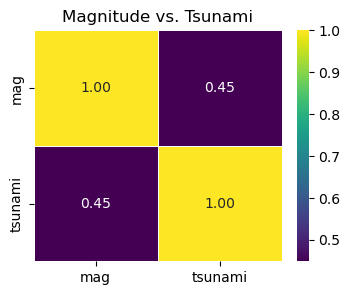

In [18]:
# Filter data for 'mb' magnitude type
mb_quakes = quakes[quakes['magType'] == 'mb']

# Create a heatmap for correlation coefficients
correlation_matrix = mb_quakes[['mag', 'tsunami']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(4, 3))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Magnitude vs. Tsunami')
plt.show()

## 9
For the 5 countries with the most covid cases (cumulative), find the day with the largest number of cases.

In [19]:
# Group by 'countriesAndTerritories'
grouped_data = covid_parsed.groupby('countriesAndTerritories')

# Sum the 'cases' for each country to get cumulative cases
cumulative_cases = grouped_data['cases'].sum()

# Find the day with the largest number of cases for each country
max_cases_day = grouped_data.apply(lambda x: x.loc[x['cases'].idxmax()])

# Sort by cumulative cases and select the top 5 countries
top_countries = cumulative_cases.nlargest(5).index
for country in top_countries:
    print(f"Country: {country}, Day with the most cases: {max_cases_day.loc[country]['dateRep']}")

Country: USA, Day with the most cases: 25/07/2020
Country: India, Day with the most cases: 17/09/2020
Country: Brazil, Day with the most cases: 30/07/2020
Country: Russia, Day with the most cases: 18/07/2020
Country: Peru, Day with the most cases: 17/08/2020


## 10
Find the 7-day average change in COVID-19 cases for the last week in the data for the countries found in part 2.

In [20]:
# Filter data for the top 5 countries
top_countries_data = covid_parsed[covid_parsed['countriesAndTerritories'].isin(top_countries)]

# Convert 'dateRep' column to datetime
top_countries_data['dateRep'] = pd.to_datetime(top_countries_data['dateRep'], format='%d/%m/%Y')

# Sort data by country and date
top_countries_data = top_countries_data.sort_values(by=['countriesAndTerritories', 'dateRep'])

# Calculate 7-day average change in cases
top_countries_data['7_day_avg_change'] = top_countries_data.groupby('countriesAndTerritories')['cases'].diff().rolling(window=7).mean()

# Filter data for the last week
last_week_data = top_countries_data[top_countries_data['dateRep'] >= top_countries_data['dateRep'].max() - pd.DateOffset(days=6)]
print(last_week_data[['countriesAndTerritories', 'dateRep', 'cases', '7_day_avg_change']])

           countriesAndTerritories    dateRep  cases  7_day_avg_change
date                                                                  
2020-09-12                  Brazil 2020-09-12  43718          -1068.00
2020-09-13                  Brazil 2020-09-13  33523            479.29
2020-09-14                  Brazil 2020-09-14  14768             35.29
2020-09-15                  Brazil 2020-09-15  15155            697.43
2020-09-16                  Brazil 2020-09-16  36653           3196.29
2020-09-17                  Brazil 2020-09-17  36820            143.43
2020-09-18                  Brazil 2020-09-18  36303           -607.71
2020-09-12                   India 2020-09-12  97570           1591.14
2020-09-13                   India 2020-09-13  94372            534.29
2020-09-14                   India 2020-09-14  92071            181.29
2020-09-15                   India 2020-09-15  83809           1142.86
2020-09-16                   India 2020-09-16  90123             59.57
2020-0

## 11
Find the first date that each country other than China had cases:

In [21]:
# Convert 'dateRep' column to datetime format
covid_parsed['dateRep'] = pd.to_datetime(covid_parsed['dateRep'], format='%d/%m/%Y')

# Filter data for countries other than China
non_china_data = covid_parsed[covid_parsed['countriesAndTerritories'] != 'China']

# Group by country and find the first date with cases
first_date_with_cases = non_china_data[non_china_data['cases'] > 0].groupby('countriesAndTerritories')['dateRep'].min()
first_date_with_cases

countriesAndTerritories
Afghanistan                                  2020-02-25
Albania                                      2020-03-09
Algeria                                      2020-02-26
Andorra                                      2020-03-03
Angola                                       2020-03-22
Anguilla                                     2020-03-27
Antigua_and_Barbuda                          2020-03-15
Argentina                                    2020-03-04
Armenia                                      2020-03-01
Aruba                                        2020-03-13
Australia                                    2020-01-25
Austria                                      2020-02-26
Azerbaijan                                   2020-02-29
Bahamas                                      2020-03-16
Bahrain                                      2020-02-24
Bangladesh                                   2020-03-09
Barbados                                     2020-03-18
Belarus                 

## 12
Rank the countries by maximum total cases using percentiles. Sort by cases. Replace all _ with blank spaces. Show percentiles with two decimals.

In [22]:
# Calculate total cases per country
total_cases_per_country = covid_parsed.groupby('countriesAndTerritories')['cases'].sum()

# Calculate percentiles
percentiles = total_cases_per_country.rank(pct=True).apply(lambda x: x * 100)

# Format country names (replace underscores with blank spaces)
formatted_countries = total_cases_per_country.index.str.replace('_', ' ')

# Combine total cases, percentiles, and formatted country names into a DataFrame
country_rankings = pd.DataFrame({
    'Country': formatted_countries,
    'Total Cases': total_cases_per_country.values,
    'Percentile': percentiles.values
})

# Sort by Total Cases
country_rankings = country_rankings.sort_values(by='Total Cases', ascending=False)
country_rankings['Percentile'] = country_rankings['Percentile'].apply(lambda x: f"{x:.2f}")
country_rankings

Country  Total Cases Percentile
195                                         USA      6674458     100.00
92                                        India      5214677      99.52
27                                       Brazil      4455386      99.05
159                                      Russia      1085281      98.57
152                                        Peru       750098      98.10
43                                     Colombia       743945      97.62
126                                      Mexico       684113      97.14
176                                South Africa       655572      96.67
179                                       Spain       640040      96.19
7                                     Argentina       588999      95.71
41                                        Chile       441150      95.24
70                                       France       415481      94.76
94                                         Iran       413149      94.29
199                              United Kingdom       381614      93.81
15                                   Bangladesh       344264      93.33
166                                Saudi Arabia       328144      92.86
95                                         Iraq       307385      92.38
147                                    Pakistan       304386      91.90
193                                      Turkey       298039      91.43
99                                        Italy       293025      90.95
153                                 Philippines       276289      90.48
75                                      Germany       267773      90.00
93                                    Indonesia       232628      89.52
98                                       Israel       176933      89.05
197                                     Ukraine       166244      88.57
35                                       Canada       140867      88.10
104                                  Kazakhstan       137713      87.62
23                                      Bolivia       129419      87.14
157                                       Qatar       122693      86.67
58                                      Ecuador       122257      86.19
158                                     Romania       108690      85.71
57                           Dominican Republic       106136      85.24
149                                      Panama       104138      84.76
59                                        Egypt       101641      84.29
18                                      Belgium        99555      83.81
107                                      Kuwait        97824      83.33
132                                     Morocco        94504      82.86
146                                        Oman        91753      82.38
42                                        China        90231      81.90
183                                      Sweden        88237      81.43
137                                 Netherlands        87987      80.95
82                                    Guatemala        83664      80.48
198                        United Arab Emirates        82568      80.00
101                                       Japan        77493      79.52
154                                      Poland        76571      79.05
17                                      Belarus        74987      78.57
89                                     Honduras        70120      78.10
65                                     Ethiopia        66913      77.62
155                                    Portugal        66396      77.14
204                                   Venezuela        64284      76.67
14                                      Bahrain        62484      76.19
46                                   Costa Rica        60818      75.71
136                                       Nepal        59573      75.24
171                                   Singapore        57532      74.76
142                                     Nigeria        56735      74.29
203     

## 13
Write a Python function that matches a word containing 'z', not at the start or end of the word. It should output if it found a match.

In [23]:
def match_word_with_z(word):
    if 'z' in word[1:-1]:
        print(f"contains 'z' in the middle of the word")
        return True
    else:
        print(f"does not contain 'z' in the middle of the word")
        return False
        
word1 = "Zanzibar"
word2 = "Python"
word3 = "Zoo"
word4 = "Hult"

match_word_with_z(word1)
match_word_with_z(word2)
match_word_with_z(word3)
match_word_with_z(word4);

contains 'z' in the middle of the word
does not contain 'z' in the middle of the word
does not contain 'z' in the middle of the word
does not contain 'z' in the middle of the word


## 14
Write a Python program to remove leading zeros from an IP address (e.g.: 216.08.094.196 should become 216.8.94.196).

In [24]:
def remove_leading_zeros(ip_address):
    # Define a regular expression pattern to match each segment of the IP address
    pattern = r'\b0*(\d+)\b'
    
    # Use re.sub to replace leading zeros in each segment
    cleaned_ip = re.sub(pattern, r'\1', ip_address)
    
    return cleaned_ip

ip_address = "216.08.094.196"
cleaned_ip = remove_leading_zeros(ip_address)

print(f"Original IP: {ip_address}")
print(f"Cleaned IP: {cleaned_ip}")

Original IP: 216.08.094.196
Cleaned IP: 216.8.94.196


## 15
Write a Python program to convert a date of yyyy-mm-dd format to dd-mm-yyyy format.

2026-01-02 should become 02-01-2026

In [25]:
def convert_date_format(input_date):
    # Parse the input date string
    parsed_date = datetime.strptime(input_date, "%Y-%m-%d")
    
    # Format the date in dd-mm-yyyy format
    formatted_date = parsed_date.strftime("%d-%m-%Y")
    
    return formatted_date

input_date = "2026-01-02"
converted_date = convert_date_format(input_date)

print(f"Original date: {input_date}")
print(f"Converted date: {converted_date}")

Original date: 2026-01-02
Converted date: 02-01-2026


## 16
Write a Python program to extract year, month and date from an url.

`url = "https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"`

output: [('2016', '09', '02')]

In [26]:
def extract_date_from_url(url):
    # Define a regular expression pattern to match the date in yyyy/mm/dd format
    pattern = r'(\d{4})/(\d{2})/(\d{2})'
    
    # Use re.search to find the match in the URL
    match = re.search(pattern, url)
    
    if match:
        # Return a tuple with year, month, and date
        return [(match.group(1), match.group(2), match.group(3))]
    else:
        return None

url = "https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"
extracted_date = extract_date_from_url(url)

if extracted_date:
    print(f"Extracted date: {extracted_date}")
else:
    print("No date found in the URL.")

Extracted date: [('2016', '09', '02')]


## 17
Write a Python program to separate and print the numbers of a given string.

`String = "Ten 10, Twenty 20, Thirty 30"`

In [27]:
def extract_numbers_from_string(input_string):
    # Define a regular expression pattern to match numbers
    pattern = r'\b\d+\b'
    
    # Use re.findall to find all matches in the input string
    numbers = re.findall(pattern, input_string)
    
    return numbers

input_string = "Ten 10, Twenty 20, Thirty 30"
numbers = extract_numbers_from_string(input_string)

print(f"Original string: {input_string}")
print(f"Extracted numbers: {numbers}")

Original string: Ten 10, Twenty 20, Thirty 30
Extracted numbers: ['10', '20', '30']


## 18
Write a Python program to replace maximum 2 occurrences of space, comma, or dot with a colon.

In [28]:
def replace_delimiters(input_string):
    # Define a regular expression pattern to match space, comma, or dot
    pattern = r'[ ,.]+'
    
    # Use re.sub to replace up to two occurrences with a colon
    replaced_string = re.sub(pattern, ':', input_string, count=2)
    
    return replaced_string

input_string = "I love learning Python, for real. Obviously with Professor, Marcus Rabe. For real."
modified_string = replace_delimiters(input_string)

print(f"Original string: {input_string}")
print(f"Modified string: {modified_string}")

Original string: I love learning Python, for real. Obviously with Professor, Marcus Rabe. For real.
Modified string: I:love:learning Python, for real. Obviously with Professor, Marcus Rabe. For real.


## 19
Write a Python program to extract values between quotation marks of a string.

In [29]:
def extract_values_between_quotes(input_text):
    # Define a regular expression pattern to match values between quotation marks
    pattern = r'"([^"]+)"'
    
    # Use re.findall to find all matches in the input text
    values = re.findall(pattern, input_text)
    
    return values

text1 = '"Python", "PHP", "Java"'
extracted_values = extract_values_between_quotes(text1)

print(f"Original text: {text1}")
print(f"Extracted values: {extracted_values}")

Original text: "Python", "PHP", "Java"
Extracted values: ['Python', 'PHP', 'Java']


## 20
Write a Python program to remove multiple spaces in a string.

In [30]:
def remove_multiple_spaces(input_text):
    # Define a regular expression pattern to match multiple spaces
    pattern = r'\s+'
    
    # Use re.sub to replace multiple spaces with a single space
    cleaned_text = re.sub(pattern, ' ', input_text)
    
    return cleaned_text.strip()

text1 = 'Python      Exercises'
cleaned_text = remove_multiple_spaces(text1)

print(f"Original text: '{text1}'")
print(f"Cleaned text: '{cleaned_text}'")

Original text: 'Python      Exercises'
Cleaned text: 'Python Exercises'


## 21
Write a Python program to find all adverbs (ending on ly) and their positions in a given sentence.

In [31]:
def find_adverbs(sentence):
    # Define a regular expression pattern to match adverbs ending in "ly"
    pattern = r'\b\w+ly\b'
    
    # Use re.finditer to find all matches in the sentence
    matches = re.finditer(pattern, sentence)
    
    adverbs_positions = [(match.group(), match.start()) for match in matches]
    
    return adverbs_positions

text = "Clearly, he has no excuse for such lying behavior."
adverbs_positions = find_adverbs(text)

print(f"Original sentence: '{text}'")
print(f"Adverbs and their positions: {adverbs_positions}")

Original sentence: 'Clearly, he has no excuse for such lying behavior.'
Adverbs and their positions: [('Clearly', 0)]


## 22
Write a Python program to concatenate the consecutive numbers in a given string.

Sample text:
Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready.

Sample solution:
Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.

In [32]:
def concatenate_consecutive_numbers(input_text):
    # Define a regular expression pattern to match consecutive numbers
    pattern = r'(\b\d+)\s+(\d+\b)'
    
    # Use re.sub to replace consecutive numbers with their concatenation
    modified_text = re.sub(pattern, lambda match: match.group(1) + match.group(2), input_text)
    
    return modified_text

txt = "Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready."
modified_text = concatenate_consecutive_numbers(txt)

print(f"Original text: '{txt}'")
print(f"Modified text: '{modified_text}'")

Original text: 'Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready.'
Modified text: 'Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.'


## 23
Write a Python function that checks whether a word stars and ends with a vowel in a given string. Return true if a word matches the condition; otherwise, return false.

Sample Data:
- ("Red Orange White") -> True
- ("Red White Black") -> False
- ("abcd dkise eosksu") -> True

In [33]:
def check_word_vowels(word):
    # Check if the word starts and ends with a vowel
    return word[0].lower() in 'aeiou' and word[-1].lower() in 'aeiou'

def words_start_end_with_vowel(input_string):
    # Split the input string into words
    words = input_string.split()

    # Check each word and return True if at least one word satisfies the condition
    return any(check_word_vowels(word) for word in words)

sample_data1 = "Red Orange White"
sample_data2 = "Red White Black"
sample_data3 = "abcd dkise eosksu"

result1 = words_start_end_with_vowel(sample_data1)
result2 = words_start_end_with_vowel(sample_data2)
result3 = words_start_end_with_vowel(sample_data3)

print(f'("{sample_data1}") -> {result1}')
print(f'("{sample_data2}") -> {result2}')
print(f'("{sample_data3}") -> {result3}')

("Red Orange White") -> True
("Red White Black") -> False
("abcd dkise eosksu") -> True


## 24
Write a Python program to separate and print the numbers and their position of a given string.

In [34]:
def extract_numbers_and_positions(input_text):
    # Define a regular expression pattern to match numbers
    pattern = r'\b\d+\b'
    
    # Use re.finditer to find all matches in the input text
    matches = re.finditer(pattern, input_text)
    
    numbers_and_positions = [(match.group(), match.start()) for match in matches]
    
    return numbers_and_positions

text = "The following example creates 50 an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly."
result = extract_numbers_and_positions(text)

print(f"Original text: '{text}'")
print(f"Numbers and their positions: {result}")

Original text: 'The following example creates 50 an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly.'
Numbers and their positions: [('50', 30), ('50', 65)]


## 25
The given input strings contains some text followed by - followed by a number. Replace that number with its log value using math.log()

- `s1 = 'first-3.14'`
- `s2 = 'next-123'`

In [35]:
def replace_with_log(input_string):
    # Define a regular expression pattern to match the text followed by a hyphen and a number
    pattern = r'([^\d-]+)-([\d.]+)'
    
    # Use re.sub to replace the number with its log value
    replaced_string = re.sub(pattern, lambda match: match.group(1) + '-' + str(math.log(float(match.group(2)))), input_string)
    
    return replaced_string

s1 = 'first-3.14'
s2 = 'next-123'

result1 = replace_with_log(s1)
result2 = replace_with_log(s2)

print(f"Original string 1: '{s1}'")
print(f"Modified string 1: '{result1}'")

print(f"\nOriginal string 2: '{s2}'")
print(f"Modified string 2: '{result2}'")

Original string 1: 'first-3.14'
Modified string 1: 'first-1.144222799920162'

Original string 2: 'next-123'
Modified string 2: 'next-4.812184355372417'


## 26
Extract all words between ( and ) from the given input string as a list. Assume that the input will not contain any broken parentheses.

Text:
`ip = 'another (way) to reuse (portion) matched (by) capture groups'`

In [36]:
def extract_words_between_parentheses(input_text):
    pattern = r'\(([^)]+)\)'
    matches = re.findall(pattern, input_text)
    return matches

text = 'another (way) to reuse (portion) matched (by) capture groups'
result = extract_words_between_parentheses(text)

print(f"Original text: '{text}'")
print(f"Words between parentheses: {result}")

Original text: 'another (way) to reuse (portion) matched (by) capture groups'
Words between parentheses: ['way', 'portion', 'by']


## 27
Add [] around words starting with s and containing e and t in any order.

text:
`ip = 'sequoia subtle exhibit asset sets2 tests si_te'`

In [37]:
def add_brackets_to_words(input_text):
    pattern = r'\bs\w*?(?=[^s]*e)(?=[^s]*t)\w*\b'
    replaced_text = re.sub(pattern, lambda match: f'[{match.group()}]', input_text)
    return replaced_text

text = 'sequoia subtle exhibit asset sets2 tests si_te'
result = add_brackets_to_words(text)

print(f"Original text: '{text}'")
print(f"Modified text: '{result}'")

Original text: 'sequoia subtle exhibit asset sets2 tests si_te'
Modified text: 'sequoia [subtle] exhibit asset [sets2] tests [si_te]'
